In [45]:
pwd

'C:\\Users\\DELL'

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
data= pd.read_csv("Image1.txt")

In [48]:
data.head()

,-3.0002,-3.0379,1
0,-2.56010,-4.00340,1
1,-3.03620,-3.49110,1
2,-3.68670,-1.74540,1
3,-2.88520,-3.37610,1
4,-0.83721,-0.59433,1


In [49]:
np.random.permutation(len(data))

array([  23, 8565, 2719, ...,  780, 4285, 9147])

In [50]:
X=data.iloc[:,0:1].values
y=data.iloc[:,1:2].values

In [51]:
X.shape

(9999, 1)

In [52]:
X.dtype

dtype('float64')

In [53]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.33, random_state=42)

In [54]:
from sklearn.linear_model import LinearRegression
clf1=LinearRegression()

In [55]:
clf1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
preds=clf1.predict(X_test)

In [57]:
preds

array([[ 2.81962324],
       [ 1.73121622],
       [-1.90544676],
       ...,
       [ 2.10793125],
       [ 3.50557528],
       [ 2.89916687]])

In [58]:
clf1.score(X_test,y_test)

0.8130915920031568

In [59]:
def gradientdes(X,y,theta,alpha,num_iters) :
    m=np.size(y)
    hx=np.matmul(X,theta)
    c1=Cost(theta,X,y)
    for i in range(0, num_iters):
        temp= (alpha/m)* np.matmul(X.T, (hx-y))
        c2=Cost(theta-temp,X,y)
        
        if c1>c2:
            c1=c2
            theta=theta-temp
       
    return theta

In [60]:
def Cost(theta,X,y):
    m=y.size
    hx=np.matmul(X,theta)
    return np.sum(np.power(np.subtract(hx,y),2))/(2*m)

In [61]:
y_train.shape

(6699, 1)

In [62]:
m=y_train.size
t=X_train
X_train=np.hstack((np.matrix(np.ones(m).reshape(m,1)),t))
theta=np.matrix(np.ones(2).reshape(2,1))


In [63]:
X_train.shape

(6699, 2)

In [64]:
theta= gradientdes(X_train,y_train,theta,0.01, 1500)
Cost(theta,X_train,y_train)

1.305576957626292

[[0.84130803]
 [0.82176558]]


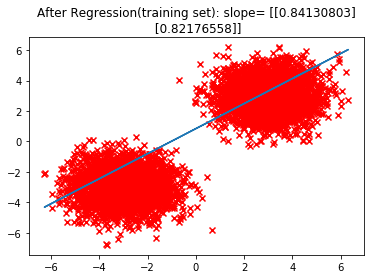

1.305576957626292


In [65]:
print(theta)
plt.scatter(np.array(t),np.array(y_train),marker='x',color='r')
plt.plot(np.array(t),np.array(np.matmul(X_train,theta)))
plt.title("After Regression(training set): slope= "+ str(theta))
plt.show()
print(Cost(theta,X_train,y_train))

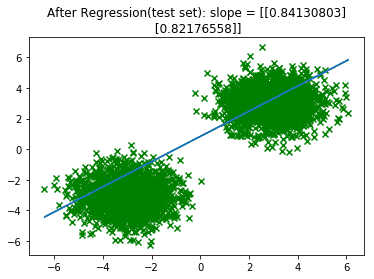

1.3278958340293223


In [66]:
m=y_test.size
t=X_test
X_test=np.hstack((np.matrix(np.ones(m).reshape(m,1)),t))
plt.scatter(np.array(t), np.array(y_test), marker = 'x', color='g')
plt.plot(np.array(t),np.array(np.matmul(X_test, theta)))
plt.title("After Regression(test set): slope = " + str(theta))
plt.show()
print(Cost(theta, X_test, y_test))

